# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [2]:
df = pd.read_csv('/Users/rohitrawat/job-prep/Assignments/accrete-ai/text-summarization/data/raw/news_summary - news_summary.csv', low_memory=False, encoding='iso-8859-1')


In [3]:
df.head(3)

,author,date,headlines,read_more,summary,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arshiya Chopra,"03 Aug 2017,Thursday",Virgin' now corrected to 'Unmarried' in IGIMS'...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns_needed = df.columns[:6]
columns_needed

Index(['author', 'date', 'headlines', 'read_more', 'summary', 'text'], dtype='object')

In [5]:
df = df[columns_needed].copy()
df.head(3)

,author,date,headlines,read_more,summary,text
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",Virgin' now corrected to 'Unmarried' in IGIMS'...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...


In [6]:
df.dropna(axis=0, inplace=True)

# EDA

In [7]:
df.describe()   

,author,date,headlines,read_more,summary,text
count,4397,4397,4397,4397,4397,4397
unique,46,241,4397,4345,4397,4342
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",Daman & Diu revokes mandatory Rakshabandhan in...,http://indiatoday.intoday.in/story/assembly-el...,The Administration of Union Territory Daman an...,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...
freq,546,76,1,13,1,13


In [8]:
# Calculate mean length
mean_lengths = df[['author', 'headlines', 'read_more', 'summary', 'text']].apply(lambda x: x.str.len()).mean().round(2)

# Calculate median length
median_lengths = df[['author', 'headlines', 'read_more', 'summary', 'text']].apply(lambda x: x.str.len()).median()

minimum_lengths = df[['author', 'headlines', 'read_more', 'summary', 'text']].apply(lambda x: x.str.len()).min()
maximum_lengths = df[['author', 'headlines', 'read_more', 'summary', 'text']].apply(lambda x: x.str.len()).max()

pd.concat([mean_lengths, median_lengths, minimum_lengths, maximum_lengths], axis=1, keys=['mean', 'median', 'minimum', 'maximum'])

,mean,median,minimum,maximum
author,13.45,13.0,10,504
headlines,55.99,57.0,31,275
read_more,140.39,118.0,58,397
summary,354.75,356.0,31,402
text,2078.44,1719.0,3,32820


In [9]:
# Calculate text lengths
summary_lengths = df['summary'].str.len()
text_lengths = df['text'].str.len()

# Calculate word counts
summary_word_counts = df['summary'].str.split().apply(len)
text_word_counts = df['text'].str.split().apply(len)

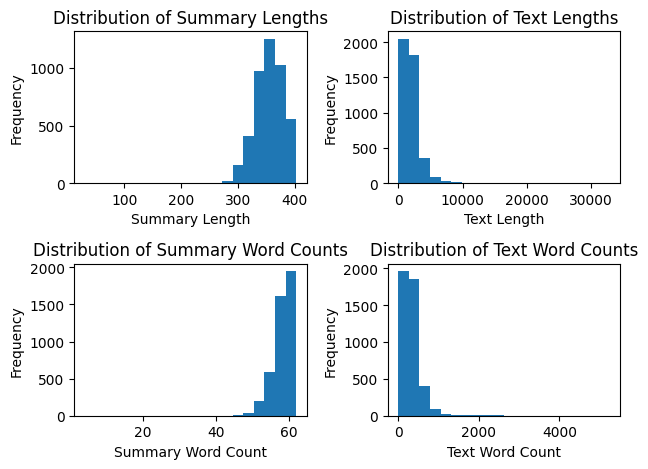

In [10]:
# Plot histogram of summary lengths
plt.subplot(2, 2, 1)
plt.hist(summary_lengths, bins=20)
plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.title('Distribution of Summary Lengths')

# Plot histogram of text lengths
plt.subplot(2, 2, 2)
plt.hist(text_lengths, bins=20)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Plot histogram of summary word counts
plt.subplot(2, 2, 3)
plt.hist(summary_word_counts, bins=20)
plt.xlabel('Summary Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Summary Word Counts')

# Plot histogram of text word counts
plt.subplot(2, 2, 4)
plt.hist(text_word_counts, bins=20)
plt.xlabel('Text Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Text Word Counts')

plt.tight_layout()
plt.show()

In [11]:
df.to_csv('/Users/rohitrawat/job-prep/Assignments/accrete-ai/text-summarization/data/processed/news_summary.csv', index=False)